#(NLP PROJECT) Text Preprocessing and Exploratory NLP Analysis on Netflix Content Descriptions

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

df = pd.read_csv("/content/Netflix dataset.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
# Keeping Relevant Columns


df = df[['description', 'type']]
df.dropna(inplace=True)

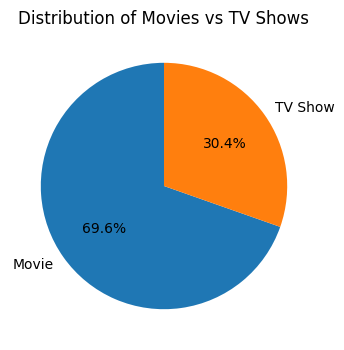

In [4]:
# Content Type Distribution


plt.figure(figsize=(6,4))
df['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribution of Movies vs TV Shows")
plt.ylabel("")
plt.show()

In [5]:
# Encode Target Variable
# Movie = 0 | TV Show = 1

df['label'] = df['type'].map({'Movie': 0, 'TV Show': 1})

In [9]:
# Text Cleaning Function (Improved)


stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

df['clean_description'] = df['description'].apply(clean_text)

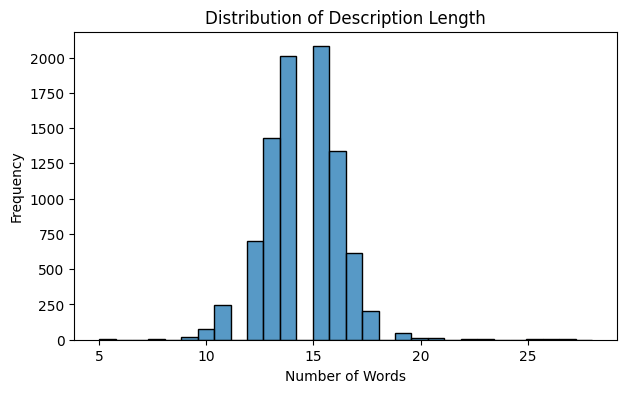

In [10]:
# STEP 7: Description Length

df['desc_length'] = df['clean_description'].apply(lambda x: len(x.split()))

plt.figure(figsize=(7,4))
sns.histplot(df['desc_length'], bins=30)
plt.title("Distribution of Description Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Train-Test Split (Stratified)

# Ensure 'label' column is present, as it might have been lost due to kernel state inconsistencies
if 'label' not in df.columns:
    df['label'] = df['type'].map({'Movie': 0, 'TV Show': 1})

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_description'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

In [13]:
# TF-IDF Vectorization (Accuracy Booster)

tfidf = TfidfVectorizer(
    max_features=12000,
    ngram_range=(1,2),
    min_df=3,
    max_df=0.9
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
# Train Logistic Regression Model

model = LogisticRegression(
    max_iter=4000,
    class_weight='balanced'
)

model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=4000)

In [16]:
# Model Testing

y_pred = model.predict(X_test_tfidf)

In [17]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7156640181611805


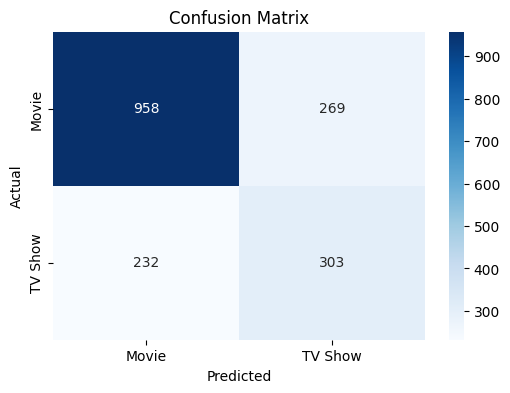

In [18]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Movie', 'TV Show'],
    yticklabels=['Movie', 'TV Show']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
# Classification Report

print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))

              precision    recall  f1-score   support

       Movie       0.81      0.78      0.79      1227
     TV Show       0.53      0.57      0.55       535

    accuracy                           0.72      1762
   macro avg       0.67      0.67      0.67      1762
weighted avg       0.72      0.72      0.72      1762

